# Introducción a Python para ciencias e ingenierías (notebook 3)


Ing. Martín Gaitán (Phasety)


![](img/logo_small.png)

--------


## Veamos un poco más de numpy

In [2]:
import numpy as np

`diag` pone el array dado en diagonal ascendente completando el resto con ceros

In [86]:
a = np.diag([1,2,3,4])
np.rot90(a, k=2)

array([[4, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 1]])

Podemos decirle qué diagonal con un offset entero

In [8]:
np.diag([1,2,3], k=1)

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

El método `reshape` es otra manera de definir la forma de un array, generando uno nuevo array (a diferencia de `A.shape` que simplemente es otra vista del mismo array)

In [89]:
A = np.arange(9).reshape((3,3))
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [11]:
B = A.reshape(A.shape)  # es igual a A.copy()

In [13]:
A is B

False

`rot90` permite rotar un array multidimensional

In [14]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [15]:
np.rot90(A)

array([[2, 5, 8],
       [1, 4, 7],
       [0, 3, 6]])

In [16]:
np.rot90(A, k=2)  # rotamos 180º

array([[8, 7, 6],
       [5, 4, 3],
       [2, 1, 0]])

### Meshgrids 

Una funcion importante es `meshgrid`, que permite 

In [90]:
x = np.linspace(-3, 3, 7)
y = np.linspace(-3, 2, 6)
print(x)
print(y)
grid = xx, yy = np.meshgrid(x, y)
grid

[-3. -2. -1.  0.  1.  2.  3.]
[-3. -2. -1.  0.  1.  2.]


[array([[-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.],
        [-3., -2., -1.,  0.,  1.,  2.,  3.]]),
 array([[-3., -3., -3., -3., -3., -3., -3.],
        [-2., -2., -2., -2., -2., -2., -2.],
        [-1., -1., -1., -1., -1., -1., -1.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 2.,  2.,  2.,  2.,  2.,  2.,  2.]])]

![](img/meshgrid.png)

In [58]:
%matplotlib inline    # alternativa  %matplotlib notebook
from matplotlib import pyplot as plt

In [73]:
z = (xx * yy) * 2
z

array([[ 18.,  12.,   6.,  -0.,  -6., -12., -18.],
       [ 12.,   8.,   4.,  -0.,  -4.,  -8., -12.],
       [  6.,   4.,   2.,  -0.,  -2.,  -4.,  -6.],
       [ -0.,  -0.,  -0.,   0.,   0.,   0.,   0.],
       [ -6.,  -4.,  -2.,   0.,   2.,   4.,   6.],
       [-12.,  -8.,  -4.,   0.,   4.,   8.,  12.]])

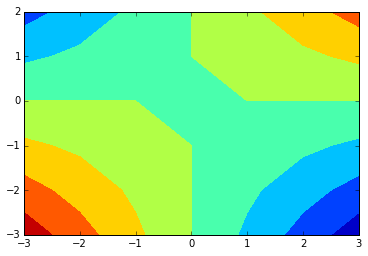

In [74]:
plt.contourf(x, y, z)

### Más sobre indizado y rebanado

Hay otras maneras de obtener elementos

In [96]:
a = np.random.random_integers(0, 30, 10)   # 10 enteros aleatorios entre 0 y 30
a

array([ 1, 15, 30,  5,  7, 29,  5,  8, 25, 30])

In [92]:
a[[1, 2, 4, 1]]    # selecciona el elemento 1, 2, el 4 y  de nuevo el 1

array([28, 29, 17, 28])

Por otro lado, ya sabemos que las operaciones con arrays se **difunden** (broadcasting). Incluso las binarias

In [97]:
a > 15    # qué elementos de a son mayores a 10 ?

array([False, False,  True, False, False,  True, False, False,  True,  True], dtype=bool)

Con un array booleano de igual tamaño podemos hacer una "máscara": seleccionar sólo los elementos que cumplen una condición

In [21]:
a[a > 10]

array([23, 20, 15, 30, 18, 12, 21, 18, 18])

(Este tipo de slicing especial **crea copias**, no vistas. Usar cuando lo amerite.)


Si en vez de los valores que cumples una condición, queremos las posiciones, podemos usar la función `where`

In [98]:
np.where(a > 15)     # devuelve las posiciones. 

(array([2, 5, 8, 9]),)

In [100]:
np.where(a > 15, a, 0)

array([ 0,  0, 30,  0,  0, 29,  0,  0, 25, 30])

In [24]:
b = 0
np.where(a > 10, a, b)   # para cada i-elemento a[i] si True, si no b[i] (o constante)   

array([23, 20, 15,  0, 30, 18, 12, 21, 18, 18])

Selecciones avanzadas: 

![](http://scipy-lectures.github.io/_images/numpy_fancy_indexing.png)



### Lectura desde texto y archivos

Como numpy se especializa en manejar números, tiene muchas funciones para crear arrays a partir de información numérica a partir de texto o archivos (como los CSV, por ejemplo).


In [107]:
a_desde_str = np.fromstring(u"""1.0 2.3   3.0 4.1   
-3.1 2  5.0 4.5""", sep=" ", dtype=float)
a_desde_str.shape = (2, 4)
a_desde_str

array([[ 1. ,  2.3,  3. ,  4.1],
       [-3.1,  2. ,  5. ,  4.5]])

Para cargar desde un archivo existe la función `loadtxt`. Por ejemplo tenemos el archivo `data/critical.dat` que es el resultado del cálculo de una linea crítica global para un sistema químico binario.

In [112]:
%less data/critical.dat

In [108]:
np.loadtxt?

Vemos que el patrón es en columnas separadas por espacios en blanco y las dos primeras filas son headers

In [113]:
cri_data = np.loadtxt('data/critical.dat', skiprows=2, usecols=[0, 1, 2, 3])
cri_data.shape

(211, 4)

Por defecto, devuelve una matriz 2D `numero_lineas` x `columnas`, o sea, la fila 0 es la primer linea de números

In [114]:
cri_data[:, 0]

array([ 304.21  ,  304.2056,  304.2011,  304.192 ,  304.174 ,  304.1379,
        304.0657,  303.9211,  303.6309,  303.2894,  302.9461,  302.6013,
        302.2547,  301.9064,  301.5565,  301.2048,  300.8514,  300.4962,
        300.1394,  299.7807,  299.4203,  299.0581,  298.6941,  298.3283,
        297.9606,  297.5911,  297.2198,  296.8466,  296.4716,  296.0946,
        295.7158,  295.335 ,  294.9524,  294.5677,  294.1812,  293.7927,
        293.4022,  293.0097,  292.6152,  292.2187,  291.8201,  291.4195,
        291.0169,  290.6122,  290.2054,  289.7965,  289.3855,  288.9724,
        288.5572,  288.1398,  287.7202,  287.2984,  286.8745,  286.4484,
        286.02  ,  285.5894,  285.1566,  284.7215,  284.2841,  283.8444,
        283.4025,  282.9582,  282.5116,  282.0627,  281.6114,  281.1577,
        280.7017,  280.2432,  279.7824,  279.3192,  278.8535,  278.3854,
        277.9148,  277.4417,  276.9662,  276.4882,  276.0077,  275.5246,
        275.0391,  274.551 ,  274.0603,  273.5671, 

Si directamente queremos los vectores (las columnas), podemos pedir que "desempaque" las columnas

In [115]:
t, p, d, x = np.loadtxt('data/critical.dat', skiprows=2, usecols=[0, 1, 2, 3], unpack=True)

In [116]:
t

array([ 304.21  ,  304.2056,  304.2011,  304.192 ,  304.174 ,  304.1379,
        304.0657,  303.9211,  303.6309,  303.2894,  302.9461,  302.6013,
        302.2547,  301.9064,  301.5565,  301.2048,  300.8514,  300.4962,
        300.1394,  299.7807,  299.4203,  299.0581,  298.6941,  298.3283,
        297.9606,  297.5911,  297.2198,  296.8466,  296.4716,  296.0946,
        295.7158,  295.335 ,  294.9524,  294.5677,  294.1812,  293.7927,
        293.4022,  293.0097,  292.6152,  292.2187,  291.8201,  291.4195,
        291.0169,  290.6122,  290.2054,  289.7965,  289.3855,  288.9724,
        288.5572,  288.1398,  287.7202,  287.2984,  286.8745,  286.4484,
        286.02  ,  285.5894,  285.1566,  284.7215,  284.2841,  283.8444,
        283.4025,  282.9582,  282.5116,  282.0627,  281.6114,  281.1577,
        280.7017,  280.2432,  279.7824,  279.3192,  278.8535,  278.3854,
        277.9148,  277.4417,  276.9662,  276.4882,  276.0077,  275.5246,
        275.0391,  274.551 ,  274.0603,  273.5671, 

In [23]:
t.size

211

Podemos graficar algo sencillo

In [117]:
%matplotlib inline

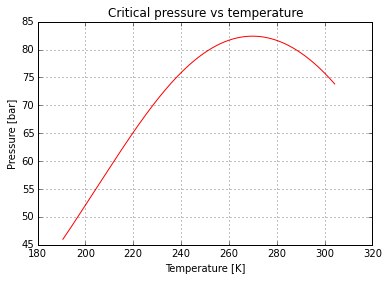

In [118]:
from matplotlib import pyplot
pyplot.plot(t, p, 'r')   # el tercer parámetro es el formato
pyplot.title('Critical pressure vs temperature')
pyplot.grid()
pyplot.xlabel('Temperature [K]')
pyplot.ylabel('Pressure [bar]')
# el punto y coma evita el output
pyplot.show();

### Arrays con columnas de distinto tipo

Para leer archivos con estructuras más complejas (o con datos faltantes) existe `numpy.genfromtxt()`. Pero además, esta función soporta un parámetro `names` para convertir el output en un **array estructurado** (o *record array*), que es parecido a un diccionario o una "hoja de cálculo", donde la homogeneidad es por columna y se puede acceder por una clave.

Esto no usa tanto desde que apareció el paquete [Pandas](http://pandas.pydata.org/)


In [122]:
struct_data = np.genfromtxt('data/critical.dat', skiprows=2, usecols=[0, 1], names=['T', 'P'])
struct_data.

dtype([('T', '<f8'), ('P', '<f8')])

In [123]:
struct_data['T']

array([ 304.21  ,  304.2056,  304.2011,  304.192 ,  304.174 ,  304.1379,
        304.0657,  303.9211,  303.6309,  303.2894,  302.9461,  302.6013,
        302.2547,  301.9064,  301.5565,  301.2048,  300.8514,  300.4962,
        300.1394,  299.7807,  299.4203,  299.0581,  298.6941,  298.3283,
        297.9606,  297.5911,  297.2198,  296.8466,  296.4716,  296.0946,
        295.7158,  295.335 ,  294.9524,  294.5677,  294.1812,  293.7927,
        293.4022,  293.0097,  292.6152,  292.2187,  291.8201,  291.4195,
        291.0169,  290.6122,  290.2054,  289.7965,  289.3855,  288.9724,
        288.5572,  288.1398,  287.7202,  287.2984,  286.8745,  286.4484,
        286.02  ,  285.5894,  285.1566,  284.7215,  284.2841,  283.8444,
        283.4025,  282.9582,  282.5116,  282.0627,  281.6114,  281.1577,
        280.7017,  280.2432,  279.7824,  279.3192,  278.8535,  278.3854,
        277.9148,  277.4417,  276.9662,  276.4882,  276.0077,  275.5246,
        275.0391,  274.551 ,  274.0603,  273.5671, 

In [30]:
type(struct_data), struct_data.ndim

(numpy.ndarray, 1)

### Volvamos a Matplotlib

Una forma útil de trabajar es buscar un ejemplo parecido a lo que buscamos (por ejemplo en la [galería](http://matplotlib.org/gallery.html)) y modificarla. Con IPython podemos cargar código remoto con el comando magic `%load` pasando la url al módulo python como argumento.


In [125]:
%load?

<IPython.core.display.Javascript object>


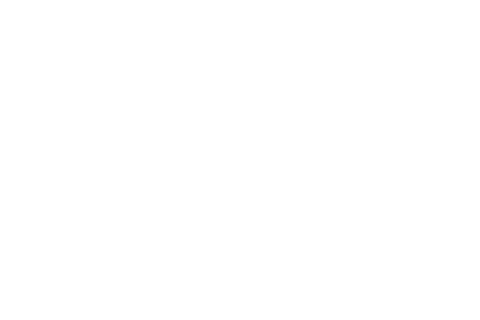

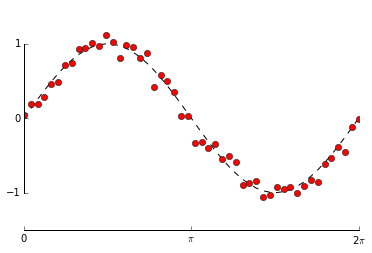

In [130]:
# %load http://matplotlib.org/mpl_examples/ticks_and_spines/spines_demo_bounds.py
"""
Demo of spines using custom bounds to limit the extent of the spine.
"""
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape)

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$','2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()


In [133]:
%matplotlib inline

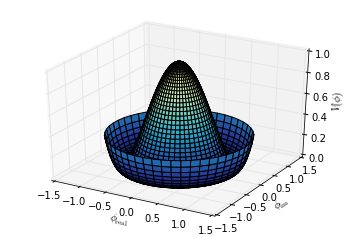

In [134]:
# %load http://matplotlib.org/mpl_examples/mplot3d/surface3d_radial_demo.py
# By Armin Moser

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
step = 0.04
maxval = 1.0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create supporting points in polar coordinates
r = np.linspace(0,1.25,50)
p = np.linspace(0,2*np.pi,50)
R,P = np.meshgrid(r,p)
# transform them to cartesian system
X,Y = R*np.cos(P),R*np.sin(P)

Z = ((R**2 - 1)**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.YlGnBu_r)
ax.set_zlim3d(0, 1)
ax.set_xlabel(r'$\phi_\mathrm{real}$')
ax.set_ylabel(r'$\phi_\mathrm{im}$')
ax.set_zlabel(r'$V(\phi)$')
plt.show()


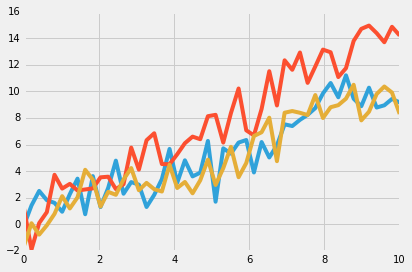

In [135]:

from matplotlib import pyplot as plt
import numpy as np

x = np.linspace(0, 10)

with plt.style.context('fivethirtyeight'):
    plt.plot(x, np.sin(x) + x + np.random.randn(50))
    plt.plot(x, np.sin(x) + 1.5 * x + np.random.randn(50))
    plt.plot(x, np.sin(x) + x + np.random.randn(50))


plt.show()

Como se puede ver, Matplotlib es muy potente y flexible, pero requiere aprender algunos conceptos. 

Hasta ahora hemos usado `pyplot`, el módulo de `matptlotlib` que emula el comportamiento de Matlab. En este modo cada función que invocamos **afecta un estado interno** en el que podemos ir "acumulando" cambios (por ejemplo, el título, la etiqueta de los ejes, etc) hasta que encuentra una llamada a la función `show()`. (el modo %pylab inline  hace el `show()` implicitamente).

Este tipo de funcionamiento es práctico y fácil, pero limitado, porque es totalmente "lineal" (procedural) . Para mejorar las prestaciones y la posibilidad de "tocar" todo lo que queramos, tenemos que usar el **modo "orientado a objetos"**. Este modo es un poco más verborrágico pero también más explícito y potente. En general se usa una mezcla entre la "practicidad" de `pyplot` (modo procedural) y la orientación a objetos. Veamos un ejemplo


<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'list'>
<class 'matplotlib.text.Text'>


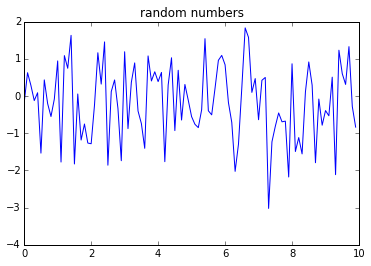

In [141]:
from matplotlib import pyplot as plt
t = x = np.arange(0, 10, 0.1)
y = np.random.randn(t.size)

fig = plt.figure()      # con una funcion de pyplot creamos un objeto tipo Figure.  
print(type(fig))
ax = fig.add_subplot(1, 1, 1)  # en la posicion 1-1 creamos un Subplot en nuestro objeto fig (que tendrá solo un plot) 
print(type(ax))
lines = ax.plot(t, y)      # en ese objeto plot graficamos x vs y
print(type(lines))
t = ax.set_title('random numbers')    # y al mismo plot le ponemos un titulo 
print(type(t))
plt.show()    # por ultimo mostramos el grafico

Supongamos que queremos graficar muchas curvas en el mismo Subplot. 

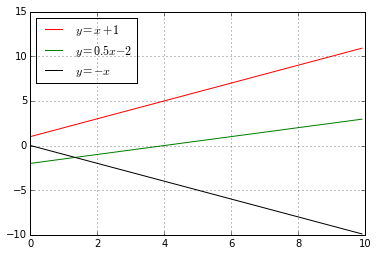

In [142]:
fig = plt.figure()      # con una funcion de pyplot creamos un objeto tipo Figure.  
ax = fig.add_subplot(111)  # en la posicion 1-1 creamos un Subplot en nuestro objeto fig (que tendrá solo un plot) 


ax.plot(x, x + 1, 'r', label=r'$y = x + 1$' )        # label con usamos LaTex
ax.plot(x, .5*x - 2, 'g', label=r'$y = 0.5x - 2$' ) 
ax.plot(x, -x, 'k', label=r'$y = -x$' ) 
ax.grid()
ax.legend(loc="upper left")
plt.show()

Pero también podemos tener una figura con múltiples subplots

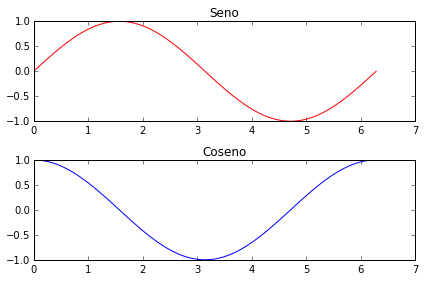

In [143]:
x = np.linspace(0, 2*np.pi, 100)
fig = plt.figure()      
ax1 = fig.add_subplot(2, 1, 1)    # el plot 1 en una figura de 2x1
ax1.set_title('Seno')
ax1.plot(x, np.sin(x), 'r') 
ax2 = fig.add_subplot(2, 1, 2)   # el plot 2 en una figura de 2x1  
ax2.plot(x, np.cos(x), 'b')
ax2.set_title('Coseno')
fig.tight_layout()  # ajusta el espaciado entre los subplots
plt.show()

Aunque ya la mostramos, todavia tenemos control sobre los objetos. Por ejemplo, podemos guardar la figura en un archivo

In [147]:
fig.savefig('senos.svg', format='svg')

Otra manera de crear figuras con múltiples subplots es usar la función `subplots`. Por supuesto, cada gráfico puede ser de un tipo distinto

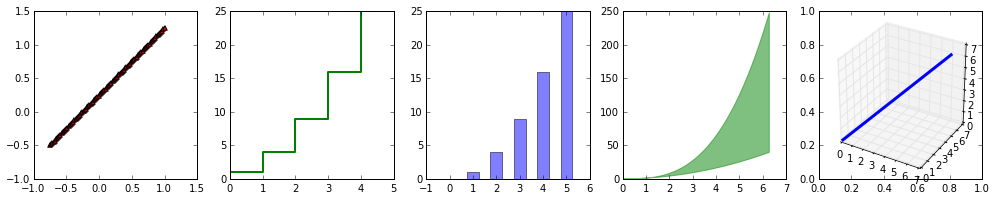

In [150]:
from matplotlib import pyplot as plt
import numpy as np

xx = np.linspace(-0.75, 1., 100)
n = np.arange(0,6)

# devuelve la figura y la lista de subplots
fig, axes = plt.subplots(1, 5, figsize=(17,3))

# scatter grafica puntos pero no los une
axes[0].scatter(xx, xx + 0.25, c='red', marker='^') 

axes[1].step(n, n**2, 'g', lw=2)

axes[2].bar(n, n**2, align="center", width=0.5, alpha=0.5)

axes[3].fill_between(x, x**2, x**3, color="green", alpha=0.5);

ax = fig.add_subplot(1, 5, 5, projection='3d')
t = np.linspace(0, 2 *np.pi, 100)
ax.plot(t, t, t, color='blue', lw=3)
pyplot.show()

Hacer gráficos en 3D no es el fin principal de matplotlib y por eso está en un toolkit aparte, pero es muy fácil. Primero hace falta importar la clase para el tipo Axes3D

In [35]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

Eso "parcha" la clase para que los subplot puedan ser 3d

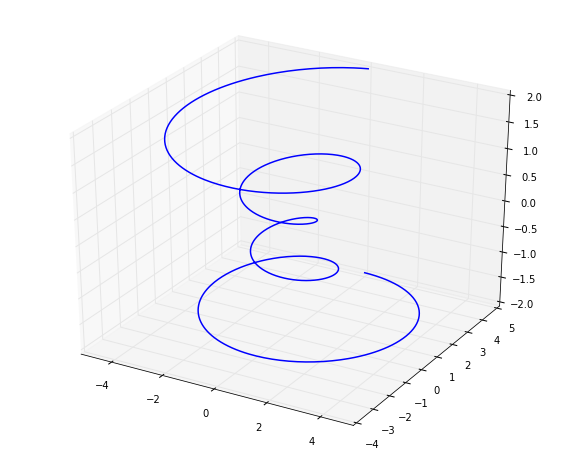

In [36]:
fig = plt.figure(figsize=(10,8))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 1, 1, projection='3d')

theta = np.linspace(-4 * np.pi, 4 * np.pi, 1000)
z = np.linspace(-2, 2, 1000)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x,y,z, lw=1.5)
plt.show()

¡Matplotlib es genial! Es libre y gratis y brinda resultados excepcionales. Seguro lo usarás para tu próximo paper/poster

## Scipy: parado sobre hombros de gigantes

El *framework* Scipy en los arrays multidimensionales de Numpy e implementa cientos de funciones algoritmos científicos de alto nivel. Algunas de las cosas que trae

* Integración y EDO ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimización ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolación ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Transformada de Fourier ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Procesamiento de señales ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Álgebra lineal ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Algoritmos optimizados para matrices ralas ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Estadística ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Procesamiento de imágenes ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* Entrada/salida de archivos ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))
* Funciones especiales ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))



## Integrales

La evaluación numérica de integrales de la forma

$\displaystyle \int_a^b f(x) dx$

se llaman *cuadratura numérica*, o simplemente *cuadratura*. SciPy tiene las funciones  `quad`, `dblquad` y `tplquad` para cuadraturas simples, dobles o triples. 


In [41]:
from matematica import cuadratica
cuadratica.raices??

In [151]:
from scipy.integrate import quad

# definimos f f(x)
def f(x):
    return 2*x

quad?

In [153]:
val, abserr = quad(f, 0, 3)

print("integral value =", val, ", absolute error =", abserr)

integral value = 9.0 , absolute error = 9.992007221626409e-14


Si necesitaramos pasarle parámetros a nuestra función lo hacemos en un tupla en el argumento `args`

In [42]:
def f_con_parametro(x, n):
    return x**n

quad(f_con_parametro, 0, 5, args=(3,))



(156.25000000000003, 1.7347234759768075e-12)

In [154]:
from scipy import integrate
integrate.

### Optimización y ajuste de curvas

In [157]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

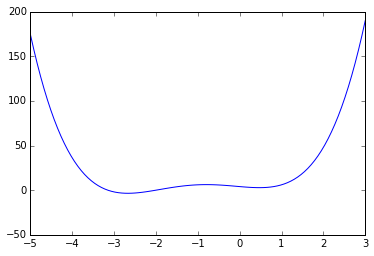

In [158]:
fig, ax  = pyplot.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

Podemos encontrar un mínimo usando `fmin_bfgs` con un punto de partida

In [160]:
from scipy import optimize
x_min1 = optimize.fmin_bfgs(f, -2)     # http://en.wikipedia.org/wiki/BFGS
optimize.fmin_bfgs??

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10


In [78]:
x_min2 = optimize.fmin_bfgs(f, 0) 
x_min2

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 6
         Function evaluations: 24
         Gradient evaluations: 8


array([ 0.46961742])

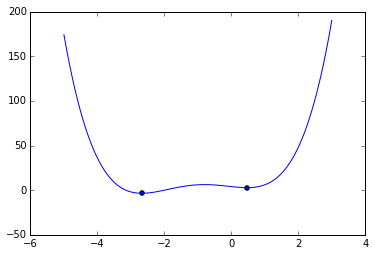

In [79]:
mins = np.array([x_min1, x_min2]) 
ax.scatter(mins, f(mins))
fig

Otra tarea frecuente es ajustar parámetros de una función objetivo

In [161]:
# objetivo
def func(x, a, b, c):   # x es la variable independiente, a b y c los parametros a encontrar
    return a*np.exp(-b*x) + c


x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)   
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = optimize.curve_fit(func, x, yn)
popt, pcov

(array([ 2.63715585,  1.28786859,  0.50390792]),
 array([[ 0.01244635,  0.00475537, -0.00069377],
        [ 0.00475537,  0.01417316,  0.00437997],
        [-0.00069377,  0.00437997,  0.00249796]]))

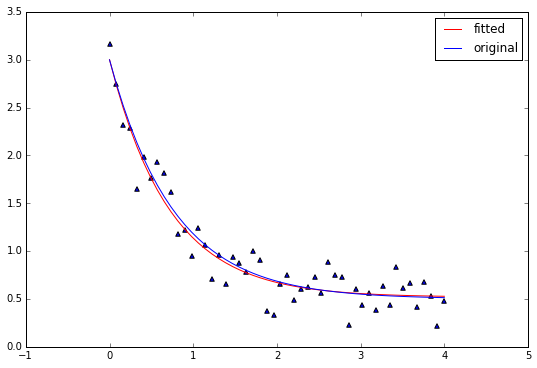

In [98]:
fig  = pyplot.figure(figsize=(9,6))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, yn, marker='^')
ax.plot(x, func(x, *popt), 'r', label='fitted')
ax.plot(x, y, label='original')
ax.legend()
plt.show()

In [162]:
optimize.newton?

In [104]:
import scipy

In [105]:
scipy.de

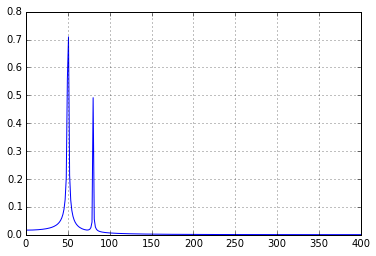

In [165]:
>>> from scipy.fftpack import fft
>>> # Number of samplepoints
>>> N = 600
>>> # sample spacing
>>> T = 1.0 / 800.0
>>> x = np.linspace(0.0, N*T, N)
>>> y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
>>> yf = fft(y)
>>> xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
>>> import matplotlib.pyplot as plt
>>> plt.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
>>> plt.grid()
>>> plt.show()

In [ ]:
import scipy.imag